## Задание

1. Прочитайте базу my_PJME_MW.csv и сделайте ее перерасчет (ресемплинг) в представление по неделям.
2. Постройте модель предсказания 4-й точки от текущей (h = 4), используя результаты автокорреляционного анализа из предшествующих уроков .
3. Постройте модель предсказания 1-й точки от текущей (h = 1), используя результаты автокорреляционного анализа из предшествующих уроков.
4. Примените авторекурсию и сравните результат в 4-й точке путем прямого моделирования и путем рекурсивного моделирования на длине выборки из 4-х точек.
5. Оцените рост ошибки прогнозирования рекурсивной модели в интервалах от 1-й до 10-й, от 10-й до 20-й, от 20-й до 30-й, .. .10i-й до (i+1)10 -й,... ,от 90 до 100-й точках (используйте осреднение по десяткам точек)
6. Сделайте вывод о том, как изменилось поведение ошибки предсказания ряда

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os

In [129]:
#Path_Energy = 'PJME_hourly.csv'
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])


In [130]:
data = data.resample('d').mean()

In [131]:
data = data.resample('w').agg({'PJME_MW':'mean', 'year':'max', 'month':'max', 'quarter':'max', 'weekofyear':'max', 'is_holiday':'sum', \
                               'is_prev_holiday':'sum', 'is_next_holiday':'sum'})

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 866 entries, 2002-01-06 to 2018-08-05
Freq: W-SUN
Data columns (total 12 columns):
PJME_MW            866 non-null float64
year               866 non-null float64
month              866 non-null float64
dayofmonth         866 non-null float64
quarter            866 non-null float64
dayofyear          866 non-null float64
weekofyear         866 non-null float64
dayofweek          866 non-null float64
hour               866 non-null float64
is_holiday         866 non-null float64
is_prev_holiday    866 non-null float64
is_next_holiday    866 non-null float64
dtypes: float64(12)
memory usage: 88.0 KB


In [6]:
#импорт модулей для формирования модели
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [132]:
def make_diff(df, src_name, n, trg_name):
    df[trg_name] = 0.0
    df[trg_name].values[n:] = df[src_name].values[n:] - df[src_name].values[n-1:-1]
    

In [133]:
def add_shifted(df, src_name, n, pref):
    trg_name = f'{pref}_{n}'
    df[trg_name] = 0.0
    df[trg_name].values[n:] = df[src_name].values[:-n]

In [98]:
#data = data.drop(columns=['t_1', 't_2'])

In [134]:
make_diff(data, 'PJME_MW', 1, 'diff1')
make_diff(data, 'diff1', 2, 'diff2')

In [136]:
%%time
for i in range(52):
    add_shifted(data, 'PJME_MW', i+1, 't')
    add_shifted(data, 'diff1', i+1, 'd1')
    add_shifted(data, 'diff2', i+1, 'd2')

Wall time: 82.8 ms


In [81]:
add_shifted(data, 'PJME_MW', 2, 't')

In [137]:
data.to_csv('pjme.csv', sep=';', encoding='cp1251')

In [135]:
data.head()

,PJME_MW,year,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,diff1,diff2
Date,,,,,,,,,,
2002-01-06,32383.053744,2002.0,1.0,1.0,1.0,1.0,0.0,1.0,0.000000,0.000000
2002-01-13,31487.386905,2002.0,1.0,1.0,2.0,0.0,0.0,0.0,-895.666839,0.000000
2002-01-20,31452.880952,2002.0,1.0,1.0,3.0,0.0,1.0,0.0,-34.505952,861.160887
2002-01-27,30141.529762,2002.0,1.0,1.0,4.0,1.0,0.0,1.0,-1311.351190,-1276.845238
2002-02-03,29196.488095,2002.0,2.0,1.0,5.0,0.0,0.0,0.0,-945.041667,366.309524


In [11]:
h=1
target = data['PJME_MW'].values[h:].reshape((data.shape[0]-h,1))
target.shape

(865, 1)

In [ ]:
X = data_d.iloc[0:-h,:].values

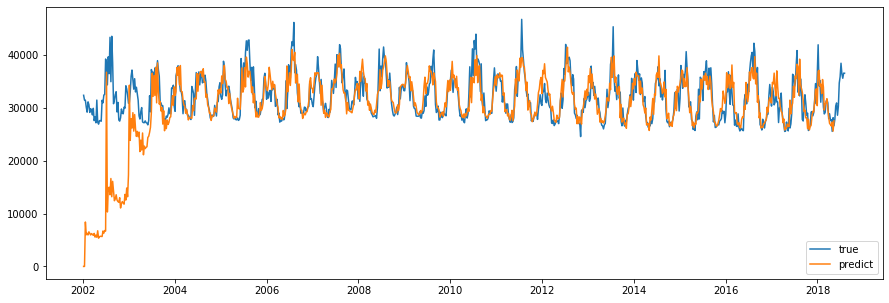

In [50]:
plt.rcParams['figure.figsize'] = (15, 5)
x1 = data['PJME_MW'].values
x2 = results_opt.predict()
plt.plot(data.index, x1, label='true')
plt.plot(data.index[:-12], x2, label='predict')
plt.legend()
plt.show()

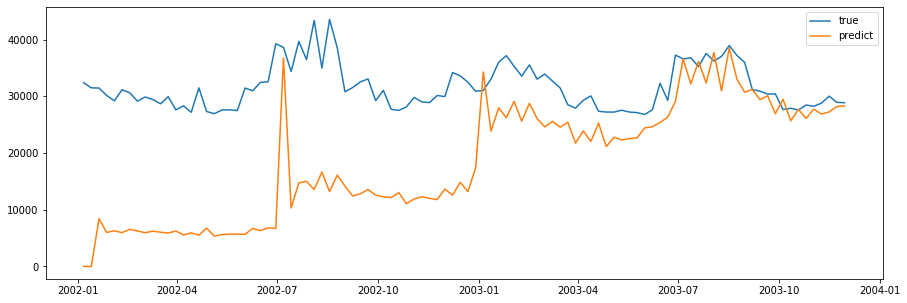

In [51]:
plt.plot(data.index[:100], x1[:100], label='true')
plt.plot(data.index[:100], x2[:100], label='predict')
plt.legend()
plt.show()

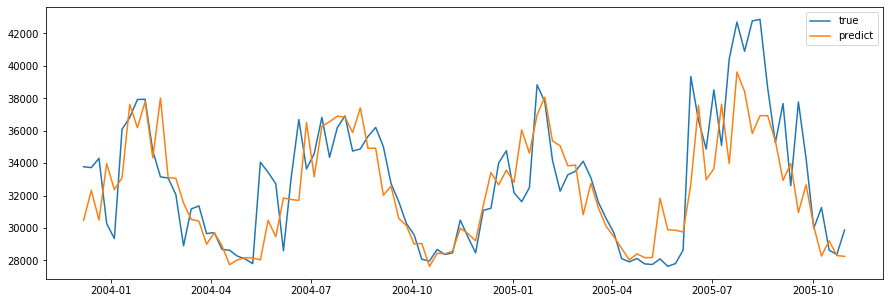

In [52]:
plt.plot(data.index[100:200], x1[100:200], label='true')
plt.plot(data.index[100:200], x2[100:200], label='predict')
plt.legend()
plt.show()

In [53]:
?results_opt.predict